In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from network import Net

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
_g = 9.81
v0 = 50
alpha=np.pi/6
_MU = 0.5

def phys_eq(t, v0):
    x = np.array([_MU * v0 * t * np.cos(alpha),
                 -0.5 * _g * t**2 + v0 * t * np.sin(alpha)])
    return x.T

def generate_data(n_points, v0):
    ts = np.linspace(0, 3, n_points)
    xs = phys_eq(ts, v0)
    return xs + 5*np.random.randn(n_points, 2), ts

In [3]:
xs, ts = generate_data(100, 50)

In [4]:
torch.manual_seed(10)
net = Net(1,2, epochs=100).to(DEVICE)

In [5]:
losses = net.fit(ts, xs, )

Epoch 0/100, loss: 6170.04
Epoch 10/100, loss: 3501.22
Epoch 20/100, loss: 6790.63
Epoch 30/100, loss: 36907.20
Epoch 40/100, loss: 264302.88
Epoch 50/100, loss: 13544601.00
Epoch 60/100, loss: 766873088.00
Epoch 70/100, loss: 20748611584.00
Epoch 80/100, loss: 297849913344.00
Epoch 90/100, loss: 2497515094016.00


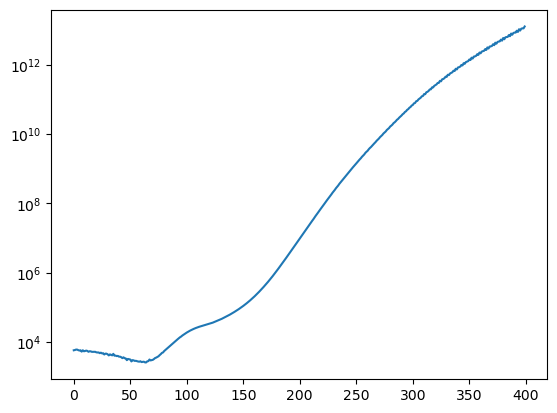

In [6]:
plt.plot(losses)
plt.yscale('log')

In [7]:
test = np.linspace(0, 6, 100)
preds = net.predict(test)

In [8]:
preds.shape

(100, 2)

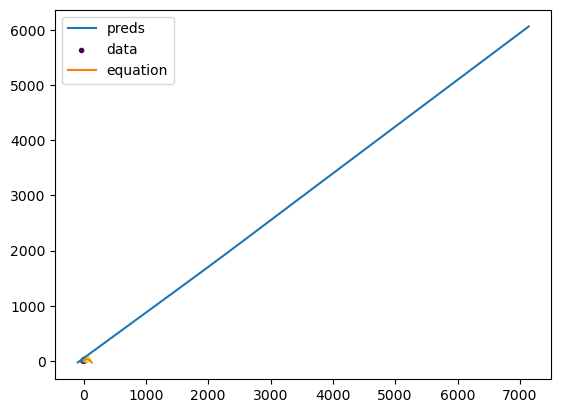

In [9]:
plt.plot(preds[:,0], preds[:,1]);
plt.scatter(xs[:,0], xs[:,1], marker='.', c=ts, cmap='viridis');
plt.plot(phys_eq(test, v0)[:,0],phys_eq(test, v0)[:,1] )
plt.legend(labels=['preds', 'data', 'equation'])

In [10]:
net.predict(np.array([6.]))

array([[7142.034 , 6058.0737]], dtype=float32)